In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy


In [2]:
dfBiden = pd.read_csv('Biden_twts_2020_classified_senti+poli.csv')
dfTrump20 = pd.read_csv('Trump_twts_2020_classified_senti+poli.csv')
dfClinton = pd.read_csv('clinton_twts_2016_classified_senti+poli.csv')
dfTrump16 = pd.read_csv('trump_twts_2016_classified_senti+poli.csv')
dfObama12 = pd.read_csv('Obama_twts_2012_classified_senti+poli.csv')
dfRomney = pd.read_csv('Romney_twts_2012_classified_senti+poli.csv')
dfObama08 = pd.read_csv('Obama_twts_2008_classified_senti+poli.csv')
dfMacCain = pd.read_csv('McCain_twts_2008_classified_senti+poli.csv')

In [3]:
# Convert sentiment to int format
dfBiden['sentiment_label'] = dfBiden['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfTrump20['sentiment_label'] = dfTrump20['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfObama12['sentiment_label'] = dfObama12['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfRomney['sentiment_label'] = dfRomney['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfObama08['sentiment_label'] = dfObama08['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfMacCain['sentiment_label'] = dfMacCain['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
# Convert political orientation to int format
dfBiden['political_label'] = dfBiden['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfTrump20['political_label'] = dfTrump20['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfObama12['political_label'] = dfObama12['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfRomney['political_label'] = dfRomney['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfObama08['political_label'] = dfObama08['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfMacCain['political_label'] = dfMacCain['political_label'].replace({'Democrat': -1, 'Republican': 1})
# Add year
dfBiden['year'] = 2020
dfTrump20['year'] = 2020
dfObama12['year'] = 2012
dfRomney['year'] = 2012
dfObama08['year'] = 2008
dfMacCain['year'] = 2008

In [26]:
#select the october surprise week of 2016

dfTrump16 = dfTrump16[(dfTrump16['time'] > "2016-10-25") & (dfTrump16['time'] < "2016-11-01")] 
dfClinton = dfClinton[(dfClinton['time'] > "2016-10-25") & (dfClinton['time']  < "2016-11-01")]

dfClinton['political_label'] = dfClinton['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfTrump16['political_label'] = dfTrump16['political_label'].replace({'Democrat': -1, 'Republican': 1})
dfClinton['sentiment_label'] = dfClinton['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})
dfTrump16['sentiment_label'] = dfTrump16['sentiment_label'].replace({'POSITIVE': 1, 'NEGATIVE': -1})

dfClinton['year'] = 2016
dfTrump16['year'] = 2016

In [31]:
demDataset = pd.concat([dfBiden[['political_label','sentiment_label','year']],
                      dfClinton[['political_label','sentiment_label','year']],
                      dfObama12[['political_label','sentiment_label','year']],
                      dfObama08[['political_label','sentiment_label','year']]])

repDataset = pd.concat([dfTrump20[['political_label','sentiment_label','year']],
                      dfTrump16[['political_label','sentiment_label','year']],
                      dfRomney[['political_label','sentiment_label','year']],
                      dfMacCain[['political_label','sentiment_label','year']]])

Text(0.5, 1.0, 'Twitter Data')

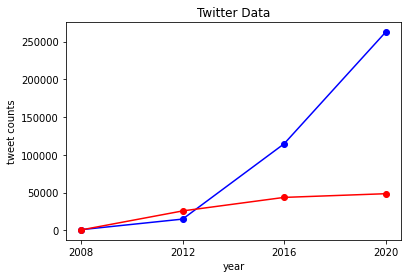

In [34]:
#count of sentiment values for each year
demDatasetYear = demDataset.groupby([demDataset['year']]).count()
repDatasetYear = repDataset.groupby([repDataset['year']]).count()
plt.plot(demDatasetYear.sentiment_label,'bo-')
plt.plot(repDatasetYear.sentiment_label,'ro-')
plt.xlabel("year")
plt.ylabel("tweet counts")
plt.xticks([2008,2012,2016,2020])
#plt.yticks([0,-.2,-.4,-.6])
plt.title("Twitter Data")

Text(0.5, 1.0, 'Twitter Data')

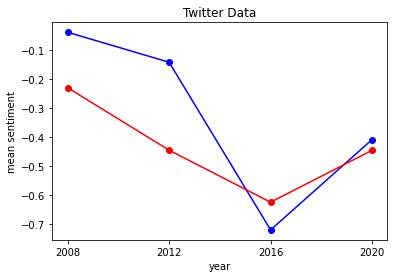

In [33]:
#count of sentiment values for each year
demDatasetYear = demDataset.groupby([demDataset['year']]).mean()
repDatasetYear = repDataset.groupby([repDataset['year']]).mean()
plt.plot(demDatasetYear.sentiment_label,'bo-')
plt.plot(repDatasetYear.sentiment_label,'ro-')
plt.xlabel("year")
plt.ylabel("mean sentiment")
plt.xticks([2008,2012,2016,2020])
#plt.yticks([0,-.2,-.4,-.6])
plt.title("Twitter Data")

In [9]:
repDatasetYear

,political_label,sentiment_label
year,,
2008,0.001727,-0.229706
2012,-0.006529,-0.445282
2016,-0.329260,-0.655322
2020,-0.503091,-0.445681


In [10]:
demDatasetYear

,political_label,sentiment_label
year,,
2008,0.139102,-0.038335
2012,0.131374,-0.141841
2016,0.550788,-0.679861
2020,0.131149,-0.408738


In [7]:
dfANES = pd.read_csv('data/anes_timeseries_cdf_csv_20211118.csv') #to be downloaded from https://electionstudies.org/data-center/anes-time-series-cumulative-data-file/

/tmp/ipykernel_92319/3834784439.py:1: DtypeWarning: Columns (4,5,6,7,8,9,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,37,38,39,40,41,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,232,253,274,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,360,381,402,423,424,425,426,427,428,429,430,

In [8]:
#VCF0004 - year
#VCF0218 - dem
#VCF0224 - rep
#VCF0424 - dem candidate
#VCF0426 - rep candidate 
#VCF0303 - party ID
interesting_cols = ['VCF0004','VCF0218', 'VCF0224', 'VCF0424', 'VCF0426', 'VCF0303']
df_clean = dfANES[interesting_cols]
df_clean = df_clean[df_clean["VCF0004"] > 2006]
df_clean = df_clean[(df_clean["VCF0303"] == 1) |(df_clean["VCF0303"] == 3)]
df_clean.rename(
    columns={
        'VCF0424': 'dem_candidate',
        'VCF0426': 'rep_candidate',
        'VCF0218': 'dem_party',
        'VCF0224': 'rep_party',
        'VCF0004': 'year',
        'VCF0303': 'party_id',
    }, 
inplace=True)

dfCleanANES = df_clean

Text(0.5, 1.0, 'ANES Data')

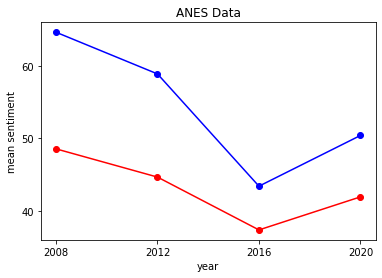

In [11]:
#Average of sentiment values for each year
anesDatasetYear = dfCleanANES.groupby([dfCleanANES['year']]).mean()
plt.plot(anesDatasetYear.dem_candidate,'bo-')
plt.plot(anesDatasetYear.rep_candidate,'ro-')
plt.xlabel("year")
plt.ylabel("mean sentiment")
plt.xticks([2008,2012,2016,2020])
plt.yticks([40,50,60])
plt.title("ANES Data")

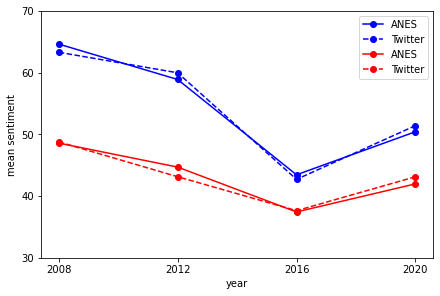

In [92]:
y1d = demDatasetYear.sentiment_label.values
y2d = anesDatasetYear.dem_candidate.values
sloped, interceptd, r_value, p_value, std_err = scipy.stats.linregress(y1d, y2d)
y_trans_d = interceptd+y1d*sloped

y1r = repDatasetYear.sentiment_label.values
y2r = anesDatasetYear.rep_candidate.values
sloper, interceptr, r_value, p_value, std_err = scipy.stats.linregress(y1r, y2r)
y_trans_r = interceptr+y1r*sloper

# start the plot
fig, ax = plt.subplots(constrained_layout=True)
# transform according to the linear model
ax.plot(y2d,'bo-')
ax.plot(y_trans_d,'bo--')
ax.plot(y2r,'ro-')
ax.plot(y_trans_r,'ro--')
plt.xlabel("year")
plt.ylabel("mean sentiment")
plt.xticks([0,1,2,3],['2008','2012','2016','2020'])
plt.yticks([30,40,50,60,70])
ax.legend(['ANES', 'Twitter','ANES','Twitter'])
plt.show()